# Stand alone heatmap

The interaction below loads and initializes a stand alone
heatmap widget for exploring gene expression data.  The widget supports
selection of genes and conditions using space separated lists of
names or "glob" patterns.

For example to select all `th0` conditions add `th0*` in the conditions
text area and click the conditions button.

To select `nsf`, `nme4`, and `nudt4` genes add `nsf nme4 nudt4` in the
genes text area and click the genes button.

In [52]:
from jp_gene_viz import dExpression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
dExpression.load_javascript_support()

In [54]:
tsv = "/Users/ndeveaux/Dev/th17_jj_gsea/out/th17_jj_deseq_output_0805/pTh17jj_RNAseq_VSDcounts.txt"
E = dExpression.display_heat_map(tsv, show=True)

In [55]:
E.match_text.value = "th17_patho96hr*"
E.match_click()
E.genes_text.value = "nsf nme4 nudt4"
E.genes_click()
E.transform_dropdown.value = dExpression.LOG2_TRANSFORM

## Th17P 96 hr Analysis

In [56]:
fdr_cutoff = .1

In [57]:
contrast_file = "/Users/ndeveaux/Dev/th17_jj_gsea/out/th17_jj_deseq_output_0805/pTh17jj_RNAseq_th17P_96h_aKo_v_th17P_96h.txt"
contrast_table = pd.read_table(contrast_file, index_col=0)

In [58]:
# Get genes whose difference in expression 
top_aKO_genes =  contrast_table[contrast_table['padj'] < fdr_cutoff].index.tolist()

In [59]:
E.genes_text.value = " ".join(top_aKO_genes)
E.genes_click()


In [60]:
contrast_file = "/Users/ndeveaux/Dev/th17_jj_gsea/out/th17_jj_deseq_output_0805/pTh17jj_RNAseq_th17P_96h_dKo_v_th17P_96h.txt"
contrast_table = pd.read_table(contrast_file, index_col=0)

In [61]:
# Get genes whose difference in expression 
top_dKO_genes =  contrast_table[contrast_table['padj'] < fdr_cutoff].index.tolist()
E.genes_text.value = " ".join(top_dKO_genes)
E.genes_click()


In [62]:
contrast_file = "/Users/ndeveaux/Dev/th17_jj_gsea/out/th17_jj_deseq_output_0805/pTh17jj_RNAseq_th17P_96h_gKo_v_th17P_96h.txt"
contrast_table = pd.read_table(contrast_file, index_col=0)

In [63]:
top_gKO_genes =  contrast_table[contrast_table['padj'] < fdr_cutoff].index.tolist()


<Container object of 3 artists>

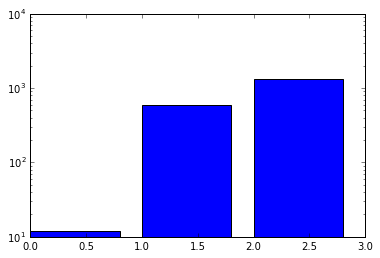

In [71]:
ind = np.arange(3) 
plt.bar(ind, [len(top_aKO_genes),  len(top_gKO_genes), len(top_dKO_genes)], log=True)


array([ 7.17319174,  2.48490665,  6.36990098])